<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject
C:\Users\saransh\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\saransh\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\saransh\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\saransh\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\saransh\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.

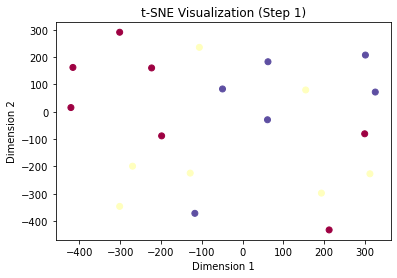

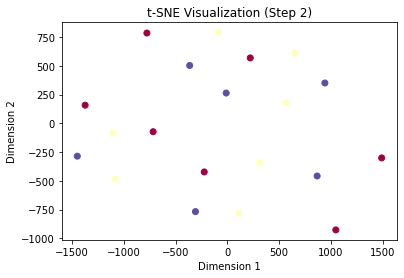

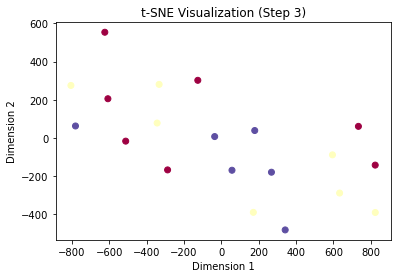

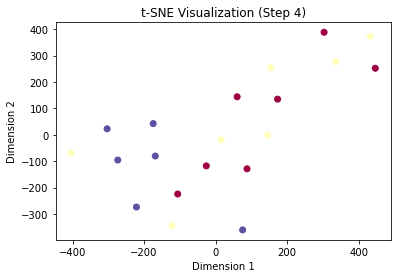

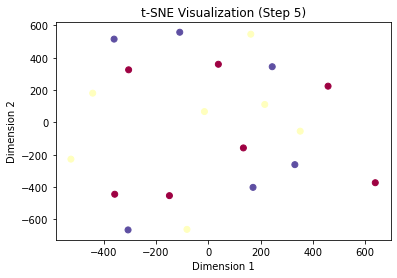

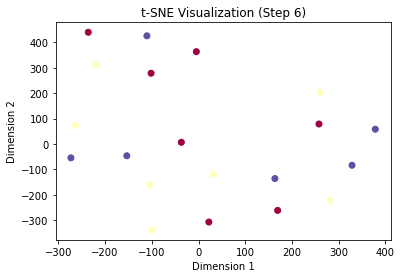

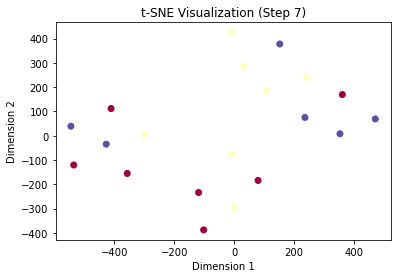

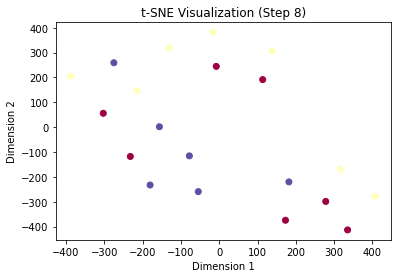

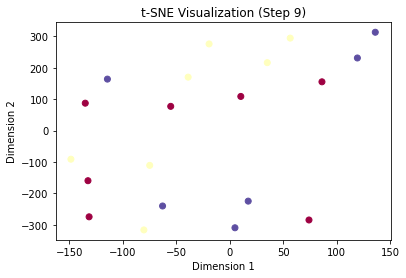

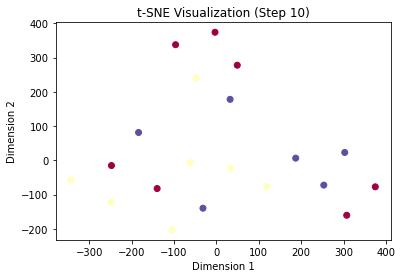

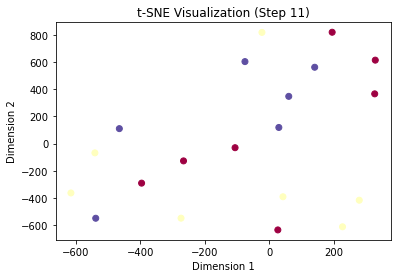

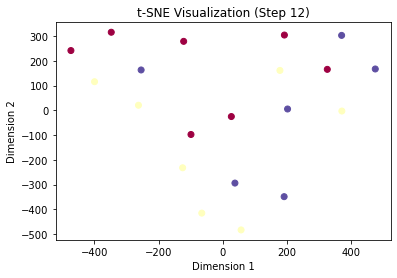

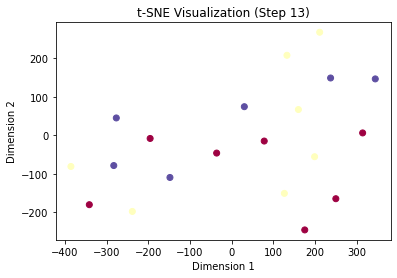

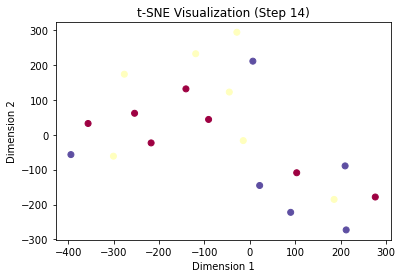

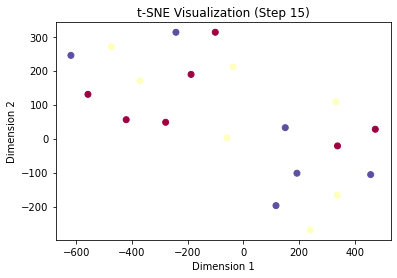

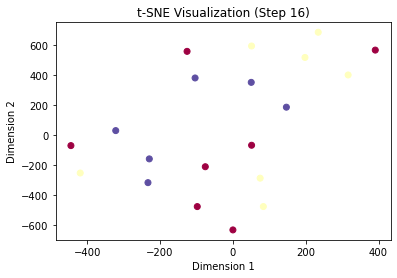

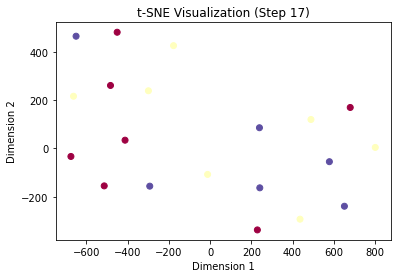

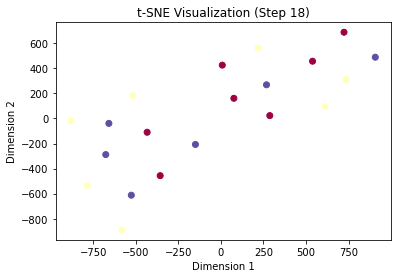

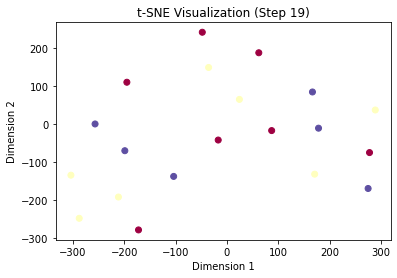

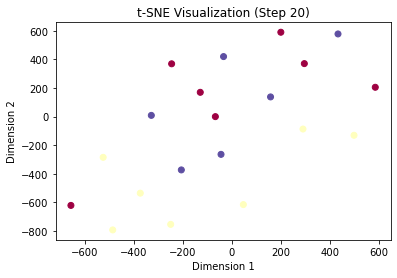

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.manifold import TSNE
initial_samples = 50 
dynamic_dataset = np.random.rand(initial_samples, 2) 
labels = np.random.choice([0, 1, 2], size=initial_samples)  
n_steps = 20 
k = 20 
perplexity = 10
tsne = TSNE(n_components=2, perplexity=perplexity)
tsne_results = []
all_labels = []
for step in range(1, n_steps + 1):
    new_data = np.random.rand(10, 2)
    dynamic_dataset = np.vstack([dynamic_dataset, new_data])
    new_labels = np.random.choice([0, 1, 2], size=len(new_data))
    labels = np.hstack([labels, new_labels])
    def knn_sampling(X, k):
        train_sample = X.copy()

        while len(train_sample) > k:
            nn = NearestNeighbors(n_neighbors=k + 1).fit(train_sample)
            distances, indices = nn.kneighbors(train_sample)
            knn_scores = np.sum(distances[:, 1:], axis=1)
            nn_score = knn_scores / knn_scores.sum()
            mnn_score = np.zeros(len(train_sample))
            for i in range(len(train_sample)):
                mutual_neighbors = set(indices[i][1:]) & set(indices[i])
                mnn_score[i] = sum(nn_score[list(mutual_neighbors)])
            index = [i for i, score in enumerate(nn_score) if score == max(nn_score)]
            if len(index) > 1:
                mnn_scores = [mnn_score[i] for i in index]
                train_index = index[mnn_scores.index(max(mnn_scores))]
            else:
                train_index = index[0]
            train_sample = np.delete(train_sample, train_index, axis=0)
        return train_sample
    train_sample = knn_sampling(dynamic_dataset, k)
    train_sample_tsne = tsne.fit_transform(train_sample)
    tsne_results.append(train_sample_tsne)
    all_labels.append(labels[:len(train_sample)])  #Store labels at each step for existing data points

for step, (tsne_result, step_labels) in enumerate(zip(tsne_results, all_labels)):
    plt.figure(figsize=(6, 4))
    plt.scatter(tsne_result[:, 0], tsne_result[:, 1], c=step_labels, cmap=plt.cm.Spectral)
    plt.title(f't-SNE Visualization (Step {step + 1})')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.show()